# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [55]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simransaini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
# Read your api key environment variable

load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [57]:
# Create a newsapi client

from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [58]:
# Fetch the Bitcoin news articles

bitcoin_articles = newsapi.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)

In [59]:
# Fetch the Ethereum news articles

ethereum_articles = newsapi.get_everything(
    q="Ethereum", language="en", sort_by="relevancy"
)

In [60]:
bitcoin_articles

{'status': 'ok',
 'totalResults': 12017,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/richard-lawler',
   'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
   'description': "You can't buy a Tesla with Bitcoin anymore..",
   'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
   'publishedAt': '2021-05-12T22:17:08Z',
   'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Alex Wilhelm',
   'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
   'description': "Today we're talking Square earn

In [61]:
analyzer.polarity_scores("By Reuters Staff")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [62]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000
4,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.00,0.925


In [63]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
 # Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

 # Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917
2,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
3,2021-05-20,,0.0000,0.000,0.000,0.000
4,2021-05-07,"It took a while to get here, but Dfinity is fi...",0.0000,0.000,0.000,1.000


In [64]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.232445,0.084950,0.03805,0.877050
std,0.465917,0.074902,0.05079,0.076662
min,-0.762700,0.000000,0.00000,0.736000
25%,0.000000,0.000000,0.00000,0.820750
50%,0.338900,0.071000,0.00000,0.869500
75%,0.577875,0.155250,0.06800,0.929000
max,0.845500,0.217000,0.18000,1.000000


In [65]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.117450,0.055500,0.023650,0.87085
std,0.310591,0.054279,0.046115,0.21594
min,-0.585900,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.85000
50%,0.077150,0.055500,0.000000,0.92450
75%,0.305375,0.077000,0.011750,0.97150
max,0.670500,0.188000,0.142000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [66]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [67]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

sw.add("ha")

In [68]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stopwords
    
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    
    return output

In [69]:
# Create a new tokens column for Bitcoin


bitcoin_df["tokens"] =  bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, today, american, fintech, com..."
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, stopped, accepting, bitc..."
3,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."
4,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.00,0.925,"[last, week, whenelon, musk, tweeted, spoken, ..."


In [70]:
# Create a new tokens column for Ethereum

ethereum_df["tokens"] =  ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917,"[solana, isnt, known, yet, outside, crypto, co..."
2,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
3,2021-05-20,,0.0000,0.000,0.000,0.000,[]
4,2021-05-07,"It took a while to get here, but Dfinity is fi...",0.0000,0.000,0.000,1.000,"[took, get, dfinity, finally, launchingin, jul..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [71]:
from collections import Counter
from nltk import ngrams

In [72]:
tokenizer(bitcoin_df.text.str.cat())

['week',
 'tesla',
 'started',
 'accepting',
 'bitcoin',
 'currency',
 'car',
 'elon',
 'musk',
 'revealed',
 'tweet',
 'suspend',
 'effort',
 'according',
 'release',
 'tesla',
 'doe',
 'appear',
 'funct',
 'charsshares',
 'square',
 'today',
 'american',
 'fintech',
 'company',
 'reported',
 'staggering',
 'billion',
 'revenue',
 'q',
 'earnings',
 'report',
 'far',
 'ahead',
 'expected',
 'tally',
 'bi',
 'charsimage',
 'tesla',
 'tesla',
 'stopped',
 'accepting',
 'bitcoin',
 'payment',
 'car',
 'concern',
 'contribute',
 'greater',
 'consumption',
 'fossil',
 'fuel',
 'according',
 'statement',
 'ceo',
 'elon',
 'musk',
 'tw',
 'charsillustration',
 'alex',
 'castro',
 'verge',
 'cryptocurrency',
 'exchange',
 'coinbase',
 'experiencing',
 'partial',
 'outage',
 'morning',
 'entire',
 'site',
 'application',
 'additionally',
 'coinbase',
 'bin',
 'charslast',
 'week',
 'whenelon',
 'musk',
 'tweeted',
 'spoken',
 'team',
 'doge',
 'developer',
 'make',
 'coin',
 'efficient',
 'imp

In [73]:
# Generate the Bitcoin N-grams where N=2

bitcoin_ngram_counts = Counter(ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2))
print(dict(bitcoin_ngram_counts))

{('week', 'tesla'): 1, ('tesla', 'started'): 1, ('started', 'accepting'): 1, ('accepting', 'bitcoin'): 4, ('bitcoin', 'currency'): 1, ('currency', 'car'): 1, ('car', 'elon'): 1, ('elon', 'musk'): 5, ('musk', 'revealed'): 1, ('revealed', 'tweet'): 1, ('tweet', 'suspend'): 1, ('suspend', 'effort'): 1, ('effort', 'according'): 1, ('according', 'release'): 1, ('release', 'tesla'): 1, ('tesla', 'doe'): 1, ('doe', 'appear'): 1, ('appear', 'funct'): 1, ('funct', 'charsshares'): 1, ('charsshares', 'square'): 1, ('square', 'today'): 1, ('today', 'american'): 1, ('american', 'fintech'): 1, ('fintech', 'company'): 1, ('company', 'reported'): 1, ('reported', 'staggering'): 1, ('staggering', 'billion'): 1, ('billion', 'revenue'): 1, ('revenue', 'q'): 1, ('q', 'earnings'): 1, ('earnings', 'report'): 1, ('report', 'far'): 1, ('far', 'ahead'): 1, ('ahead', 'expected'): 1, ('expected', 'tally'): 1, ('tally', 'bi'): 1, ('bi', 'charsimage'): 1, ('charsimage', 'tesla'): 1, ('tesla', 'tesla'): 1, ('tesla',

In [77]:
tokenizer(ethereum_df.text.str.cat())

['vitalik',
 'buterin',
 'creator',
 'ethereum',
 'wednesday',
 'donated',
 'ethereum',
 'meme',
 'coin',
 'worth',
 'billion',
 'one',
 'largestever',
 'individual',
 'philanthropy',
 'effortsbuterin',
 'transferred',
 'eth',
 'charssolana',
 'isnt',
 'known',
 'yet',
 'outside',
 'crypto',
 'community',
 'insider',
 'think',
 'blockchain',
 'platform',
 'interesting',
 'wide',
 'variety',
 'reason',
 'beginning',
 'amiable',
 'founder',
 'anatoly',
 'yakovenko',
 'charsbitcoin',
 'ethereum',
 'host',
 'altcoins',
 'suffered',
 'massive',
 'drop',
 'tuesday',
 'night',
 'wednesday',
 'morning',
 'erasing',
 'month',
 'gain',
 'hundred',
 'billion',
 'market',
 'cap',
 'overall',
 'crypto',
 'market',
 'shrunk',
 'charsit',
 'took',
 'get',
 'dfinity',
 'finally',
 'launchingin',
 'july',
 'went',
 'swiss',
 'city',
 'zug',
 'speak',
 'dominic',
 'williams',
 'ceo',
 'crypto',
 'platform',
 'dfinity',
 'blockchain',
 'project',
 'charsnew',
 'york',
 'may',
 'reuters',
 'ethereum',
 'o

In [78]:
# Generate the Ethereum N-grams where N=2

ethereum_ngram_counts = Counter(ngrams(tokenizer(ethereum_df.text.str.cat()), n=2))
print(dict(ethereum_ngram_counts))

{('vitalik', 'buterin'): 1, ('buterin', 'creator'): 1, ('creator', 'ethereum'): 1, ('ethereum', 'wednesday'): 1, ('wednesday', 'donated'): 1, ('donated', 'ethereum'): 1, ('ethereum', 'meme'): 1, ('meme', 'coin'): 1, ('coin', 'worth'): 1, ('worth', 'billion'): 1, ('billion', 'one'): 1, ('one', 'largestever'): 1, ('largestever', 'individual'): 1, ('individual', 'philanthropy'): 1, ('philanthropy', 'effortsbuterin'): 1, ('effortsbuterin', 'transferred'): 1, ('transferred', 'eth'): 1, ('eth', 'charssolana'): 1, ('charssolana', 'isnt'): 1, ('isnt', 'known'): 1, ('known', 'yet'): 1, ('yet', 'outside'): 1, ('outside', 'crypto'): 1, ('crypto', 'community'): 1, ('community', 'insider'): 1, ('insider', 'think'): 1, ('think', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'interesting'): 1, ('interesting', 'wide'): 1, ('wide', 'variety'): 1, ('variety', 'reason'): 1, ('reason', 'beginning'): 1, ('beginning', 'amiable'): 1, ('amiable', 'founder'): 1, ('founder', 'anatoly'): 1, ('ana

In [79]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [80]:
# Use token_count to get the top 10 words for Bitcoin

token_count( tokenizer(bitcoin_df.text.str.cat()), N = 10)

[('bitcoin', 10),
 ('week', 9),
 ('musk', 8),
 ('crypto', 7),
 ('tesla', 6),
 ('elon', 6),
 ('company', 5),
 ('accepting', 4),
 ('cryptocurrency', 4),
 ('currency', 3)]

In [81]:
# Use token_count to get the top 10 words for Ethereum

token_count( tokenizer(ethereum_df.text.str.cat()), N = 10)

[('ethereum', 8),
 ('crypto', 5),
 ('wednesday', 4),
 ('market', 4),
 ('currency', 4),
 ('charsbitcoin', 3),
 ('may', 3),
 ('year', 3),
 ('surge', 3),
 ('finance', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


In [84]:
bitcoin_df.text.str.cat()

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin more efficient, the imp

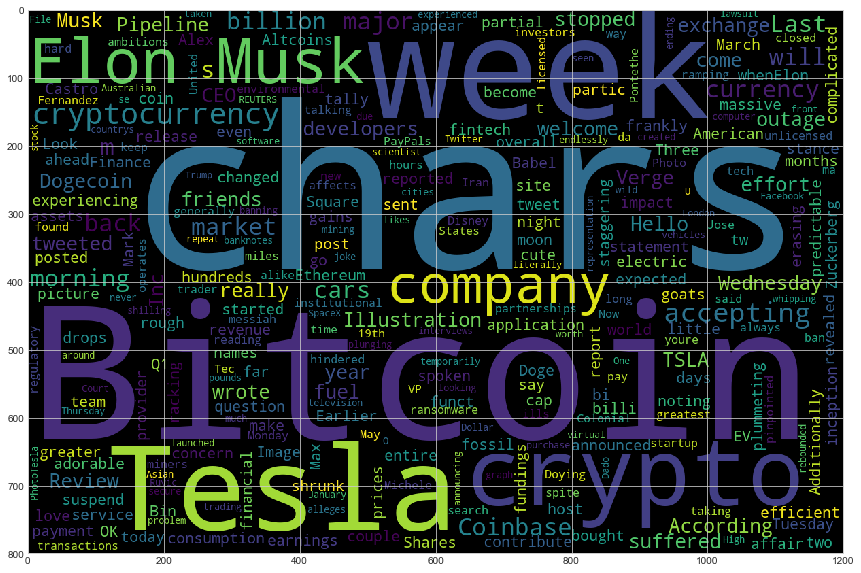

In [42]:
# Generate the Bitcoin word cloud

wc = WordCloud(width=1200, height=800, max_words=500).generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

In [85]:
ethereum_df.text.str.cat()

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]It took a while to get here, but Dfinity is finally launching.\xa0\r\nIn July 2018, I went to the Swiss city of Zug to speak to Dominic Williams, CEO of crypto platform Dfinity. Its blockchain project has… [+4319 chars]NEW YORK, May 7 (Reuters) - Ethereum has outperformed major digital currency rivals this year, bolstered by the surge in decentralized f

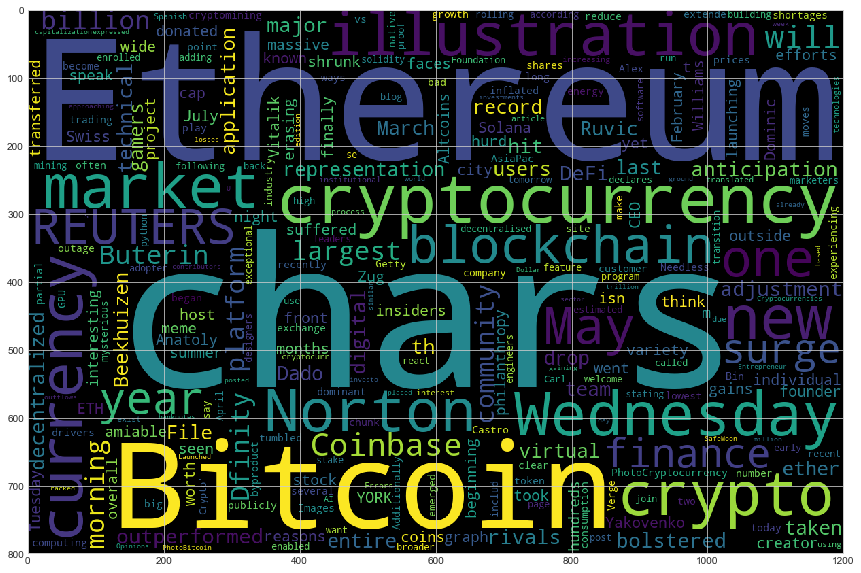

In [86]:
# Generate the Ethereum word cloud

wc = WordCloud(width=1200, height=800, max_words=500).generate(ethereum_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [87]:
import spacy
from spacy import displacy

In [88]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 6.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [89]:
# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [90]:
# Concatenate all of the Bitcoin text together

text = bitcoin_df.text.str.cat()

In [91]:
# Run the NER processor on all of the text

doc = nlp(text)

# Add a title to the document

doc.user_data["title"] = "Bitcoin NER"


In [92]:
# Render the visualization

displacy.render(doc, style='ent')

In [54]:
# List all Entities

for ent in doc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Square FAC
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
Tesla ORG
Elon Musk PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
+1307 chars]Last week DATE
Musk PERSON
Dogecoin GPE
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Babel Finance ORG
Monday DATE
hours-long TIME
this morning TIME
May 19th DATE
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
Last week DATE
Disney ORG
This week DATE
Tec PERSON
more than 5,500 miles QUANTITY
the United States GPE
Photo PERSON
Michele Doying PERSON
Verge ORG
Iran GPE
Last week DATE
Trump ORG
This week DATE
E

---

### Ethereum NER

In [93]:
# Concatenate all of the Ethereum text together
text2 = ethereum_df.text.str.cat()

In [95]:
# Run the NER processor on all of the text

doc2 = nlp(text2)

# Add a title to the document

doc2.user_data["title"] = "Ethereum NER"

In [97]:
# Render the visualization
displacy.render(doc2, style='ent')

In [98]:
# List all Entities

for ent in doc2.ents:
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
Anatoly Yakovenko PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
chars]NEW YORK GPE
May 7 DATE
Reuters ORG
this year DATE
this year DATE
this summer DATE
+5218 CARDINAL
Ethereum ORG
February 19, 2021 DATE
today DATE
April 14 DATE
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Ethereum
 ORG
Getty Images PERSON
AsiaPac ORG
Bitcoin PERSON
Ethereum ORG
number two CARDINAL
2021 DATE
99.95% PERCENT
Carl Beekhuizen PERSON
the Ethereum Foundation ORG
Beekhuizen ORG
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
chars]"We NORP
Wednesday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
Bitcoin PERSON
U.S. Dollar ORG
May 26, 2020 DATE
Dado Ruvic/File PhotoBitcoin PERSON
la

---